# Processing of datasus's tabnet data

In [68]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# %pip install -r requirements.txt

## CSV Data structure

Each line of the csv file is a confirmed case. There are many unique columns with different data on location, on treatment, etc. The description for each column can be found in data_description.txt within the same folder of the data. For this project, we will be analyzing selected columns:

### Hanseniase data structure:

From the 63 columns from the csv file, will be used for the analysis:

- DT_NOTIFIC: Date of Notification [date]: It will indicate the date (year, month, day) of the case
    - E.g. 20110201 -> year 2011 month 02 day 01

- SG_UF: Code of the Notifying State [varchar(2)]: It will indicate the macro-region of the case

- SG_UF_NOT: SG ? State of Notification State [varchar(2)]: It will indicate the State in which the case was notified


### Tuberculosis data structure:

From the 97 columns from the csv file, will be used for the analysis:

- DT_NOTIFIC: Date of Notification [date]: It will indicate the date (year, month, day) of the case
    - E.g. 20110201 -> year 2011 month 02 day 01

- SG_UF: Code of the Notifying State [varchar(2)]: It will indicate the macro-region of the case

- SG_UF_NOT: SG ? State of Notification State [varchar(2)]: It will indicate the State in which the case was notified

In [69]:
# Checks if data exists
data_path_tuberculose = '../data/tuberculose/'
if not os.path.exists(data_path_tuberculose):
    print(f'Could not find data {data_path_tuberculose}.')

data_path_hanseniase = '../data/hanseniase/'
if not os.path.exists(data_path_hanseniase):
    print(f'Could not find data {data_path_hanseniase}.')

## Data check test code
# data_pd_test = pd.read_csv(os.path.join(data_path_hanseniase, 'HANSBR01.csv'), encoding='utf-8', low_memory=False)
# data_pd_test.drop(data_pd_test.tail(1).index, inplace=True) # The last row is "total" row, it needs to be removed
# print(data_pd_test.iloc[-1])
# data_pd_test.describe()
# for index in data_pd_test.T.index:
#     if type(data_pd_test[index][1]) is not str:
#             if data_pd_test[index].std() == 0:
#                 print(f'Column {index} is a constant value!')
#         # print(f'Mean {index}: {data_pd_test[index].std()}')
#     else:
#         print(f'Column {index} is type str')


In [70]:
# Loads all data and get all in a single pandas
for i, file in enumerate([file for file in os.listdir(data_path_hanseniase) if file.endswith('.csv')]):
    data_pd_hanseniase_ = pd.read_csv(os.path.join(data_path_hanseniase, file), encoding='utf-8', low_memory=False)
    data_pd_hanseniase_.drop(data_pd_hanseniase_.tail(1).index, inplace=True) # The last row is "total" row, it needs to be removed
    if i == 0:
        data_pd_hanseniase = data_pd_hanseniase_
    else:
        data_pd_hanseniase = pd.concat([data_pd_hanseniase, data_pd_hanseniase_], ignore_index=True)
    print(f'{os.path.join(data_path_hanseniase, file)} loaded')

data_pd_hanseniase.describe()

../data/hanseniase/HANSBR15.csv loaded
../data/hanseniase/HANSBR14.csv loaded
../data/hanseniase/HANSBR10.csv loaded
../data/hanseniase/HANSBR12.csv loaded
../data/hanseniase/HANSBR09.csv loaded
../data/hanseniase/HANSBR05.csv loaded
../data/hanseniase/HANSBR19.csv loaded
../data/hanseniase/HANSBR07.csv loaded
../data/hanseniase/HANSBR06.csv loaded
../data/hanseniase/HANSBR20.csv loaded
../data/hanseniase/HANSBR02.csv loaded
../data/hanseniase/HANSBR18.csv loaded
../data/hanseniase/HANSBR03.csv loaded
../data/hanseniase/HANSBR16.csv loaded
../data/hanseniase/HANSBR01.csv loaded
../data/hanseniase/HANSBR11.csv loaded
../data/hanseniase/HANSBR17.csv loaded
../data/hanseniase/HANSBR13.csv loaded
../data/hanseniase/HANSBR04.csv loaded
../data/hanseniase/HANSBR08.csv loaded


,TP_NOT.1,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,SEM_DIAG,...,AVAL_ATU_N,ESQ_ATU_N,DOSE_RECEB,EPIS_RACIO,DTMUDESQ,CONTEXAM,DTALTA_N,TPALTA_N,IN_VINCULA,NU_LOTE_IA
count,872837.0,872837.0,8.728370e+05,872837.000000,872837.000000,872837.000000,872837.000000,8.728370e+05,8.728370e+05,872837.000000,...,872837.000000,872837.000000,872837.000000,872837.000000,8.728370e+05,872837.000000,8.728370e+05,872837.000000,872837.000000,8.728370e+05
mean,2.0,0.0,2.009428e+07,2009.361275,29.386449,294887.528666,1414.574698,2.717259e+06,2.009321e+07,5398.957213,...,0.726494,1.711740,5.968675,1.847369,8.357206e+05,2.137664,1.962522e+07,1.756129,0.062131,3.121671e+04
std,0.0,0.0,5.640452e+04,5.640731,12.404229,124198.272839,943.843812,1.361196e+06,5.753035e+04,32581.041462,...,1.174489,0.631887,5.793776,1.909651,4.014198e+06,2.818741,3.058402e+06,2.006681,0.241393,2.492281e+05
min,2.0,0.0,2.001010e+07,2001.000000,0.000000,110001.000000,0.000000,0.000000e+00,1.910050e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.0,0.0,2.004120e+07,2004.000000,21.000000,210540.000000,1389.000000,2.316633e+06,2.004103e+07,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.005080e+07,1.000000,0.000000,0.000000e+00
50%,2.0,0.0,2.009032e+07,2009.000000,26.000000,261160.000000,1485.000000,2.462974e+06,2.009022e+07,0.000000,...,0.000000,2.000000,6.000000,1.000000,0.000000e+00,2.000000,2.009100e+07,1.000000,0.000000,0.000000e+00
75%,2.0,0.0,2.014072e+07,2014.000000,35.000000,353050.000000,1535.000000,2.705850e+06,2.014061e+07,0.000000,...,1.000000,2.000000,12.000000,4.000000,0.000000e+00,3.000000,2.015030e+07,1.000000,0.000000,0.000000e+00
max,2.0,0.0,2.020123e+07,2020.000000,53.000000,530010.000000,32004.000000,9.998063e+06,2.020123e+07,202053.000000,...,3.000000,9.000000,99.000000,4.000000,2.023042e+07,99.000000,2.023050e+07,9.000000,1.000000,2.023026e+06


In [168]:
data_pd_hanseniase.columns

Index(['TP_NOT', 'TP_NOT.1', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_DIAG', 'SEM_DIAG',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS',
       'NDUPLIC_N', 'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM', 'DT_TRANSSM',
       'DT_TRANSRM', 'DT_TRANSRS', 'DT_TRANSSE', 'NU_LOTE_V', 'NU_LOTE_H',
       'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'ID_OCUPA_N', 'NU_LESOES',
       'FORMACLINI', 'AVALIA_N', 'CLASSOPERA', 'MODOENTR', 'MODODETECT',
       'BACILOSCOP', 'DTINICTRAT', 'ESQ_INI_N', 'CONTREG', 'NERVOSAFET',
       'UFATUAL', 'ID_MUNI_AT', 'DT_NOTI_AT', 'ID_UNID_AT', 'UFRESAT',
       'MUNIRESAT', 'DTULTCOMP', 'CLASSATUAL', 'AVAL_ATU_N', 'ESQ_ATU_N',
       'DOSE_RECEB', 'EPIS_RACIO', 'DTMUDESQ', 'CONTEXAM', 'DTALTA_N',
       'TPALTA_N', 'IN_VINCULA', 'NU_LOTE_IA', 'ANO_MES', 'STATE', 'MACRO',
       'ANO'],
      dtype='object')

In [71]:
# Loads all data and get all in a single pandas
for i, file in enumerate([file for file in os.listdir(data_path_tuberculose) if file.endswith('.csv')]):
    data_pd_tuberculose_ = pd.read_csv(os.path.join(data_path_tuberculose, file), encoding='utf-8', low_memory=False)
    data_pd_tuberculose_.drop(data_pd_tuberculose_.tail(1).index, inplace=True) # The last row is "total" row, it needs to be removed
    if i == 0:
        data_pd_tuberculose = data_pd_tuberculose_
    else:
        data_pd_tuberculose = pd.concat([data_pd_tuberculose, data_pd_tuberculose_], ignore_index=True)
    print(f'{os.path.join(data_path_hanseniase, file)} loaded')

data_pd_tuberculose.describe()

../data/hanseniase/TUBEBR08.csv loaded
../data/hanseniase/TUBEBR03.csv loaded
../data/hanseniase/TUBEBR06.csv loaded
../data/hanseniase/TUBEBR10.csv loaded
../data/hanseniase/TUBEBR17.csv loaded
../data/hanseniase/TUBEBR02.csv loaded
../data/hanseniase/TUBEBR01.csv loaded
../data/hanseniase/TUBEBR12.csv loaded
../data/hanseniase/TUBEBR14.csv loaded
../data/hanseniase/TUBEBR04.csv loaded
../data/hanseniase/TUBEBR11.csv loaded
../data/hanseniase/TUBEBR18.csv loaded
../data/hanseniase/TUBEBR07.csv loaded
../data/hanseniase/TUBEBR15.csv loaded
../data/hanseniase/TUBEBR16.csv loaded
../data/hanseniase/TUBEBR09.csv loaded
../data/hanseniase/TUBEBR13.csv loaded
../data/hanseniase/TUBEBR05.csv loaded


,TP_NOT.1,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,ANO_NASC,NU_IDADE_N,...,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6,TRANSF,UF_TRANSF,MUN_TRANSF
count,1589178.0,1589178.0,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,...,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06,1.589178e+06
mean,2.0,0.0,2.009565e+07,2.009498e+03,3.136304e+01,3.152009e+05,1.117648e+03,2.009524e+07,1.940466e+03,4.032089e+03,...,7.324869e-01,7.628900e-01,7.386404e-01,1.021808e+00,1.180794e+00,2.073323e-01,4.195395e-01,1.338610e-01,5.646762e-01,4.221642e-01
std,0.0,0.0,5.242932e+04,5.242982e+00,8.806424e+00,8.844692e+04,9.800487e+02,5.240693e+04,2.389586e+02,1.227461e+02,...,2.039603e+00,1.640126e+00,1.607139e+00,2.041340e+00,2.583339e+00,1.128748e+00,1.315173e+00,9.833682e-01,4.043622e+00,3.430401e+00
min,2.0,0.0,1.981071e+07,1.981000e+03,1.100000e+01,0.000000e+00,0.000000e+00,2.001010e+07,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.0,0.0,2.005052e+07,2.005000e+03,2.600000e+01,2.611600e+05,0.000000e+00,2.005043e+07,1.957000e+03,4.026000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.0,0.0,2.009121e+07,2.009000e+03,3.300000e+01,3.303900e+05,1.380000e+03,2.009113e+07,1.971000e+03,4.037000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.0,0.0,2.014072e+07,2.014000e+03,3.500000e+01,3.550300e+05,1.497000e+03,2.014071e+07,1.982000e+03,4.051000e+03,...,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.0,0.0,2.023021e+07,2.023000e+03,5.300000e+01,5.300100e+05,6.256000e+03,2.018123e+07,9.710000e+03,4.123000e+03,...,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,5.300000e+01,5.300000e+01


In [171]:
data_pd_tuberculose.columns

Index(['TP_NOT', 'TP_NOT.1', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'ANO_NASC', 'NU_IDADE_N',
       'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'IN_VINCULA', 'DT_DIGITA',
       'DT_TRANSUS', 'DT_TRANSDM', 'DT_TRANSSM', 'DT_TRANSRM', 'DT_TRANSRS',
       'DT_TRANSSE', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'ID_OCUPA_N',
       'TRATAMENTO', 'INSTITUCIO', 'RAIOX_TORA', 'TESTE_TUBE', 'FORMA',
       'EXTRAPU1_N', 'EXTRAPU2_N', 'EXTRAPUL_O', 'AGRAVAIDS', 'AGRAVALCOO',
       'AGRAVDIABE', 'AGRAVDOENC', 'AGRAVOUTRA', 'AGRAVOUTDE', 'BACILOSC_E',
       'BACILOS_E2', 'BACILOSC_O', 'CULTURA_ES', 'CULTURA_OU', 'HIV',
       'HISTOPATOL', 'DT_INIC_TR', 'RIFAMPICIN', 'ISONIAZIDA', 'ETAMBUTOL',
       'ESTREPTOMI', 'PIRAZINAMI', 'ETIONAMIDA', 'OUTRAS', 'OUTRAS_DES',
       'TRAT_SUPER', 'NU_CONTATO', 'DOENCA_TRA', 'SG_UF_AT', 'ID_MUNIC_A',
       'DT_NOTI_AT', 'SG_UF

In [172]:
tuberculose_by_nduplic_n_pd = data_pd_tuberculose.groupby("NDUPLIC_N").size().reset_index(name="quantidade")
tuberculose_by_nduplic_n_pd

,NDUPLIC_N,quantidade
0,0,1445630
1,1,135765
2,2,48
3,9,7735


In [72]:
#Busca por colunas com valores ausentes:

missing_values = data_pd_hanseniase.isnull().sum()

if missing_values.sum() == 0:
    print("Nenhum valor ausente encontrado.")
    print("Análise individual por coluna:")
    for col in data_pd_hanseniase.columns:
      print(f"Coluna {col}: {data_pd_hanseniase[col].astype(str).str.strip().eq('').sum()} valores vazios")

else:

    # Calcular a porcentagem de valores ausentes
    missing_percentage = (missing_values / len(data_pd_hanseniase)) * 100

    # Criar um DataFrame organizado por maior percentual de valores ausentes
    missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
    missing_data = missing_data[missing_data["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

    # Exibir as colunas com valores ausentes
    print(missing_data)



Nenhum valor ausente encontrado.
Análise individual por coluna:
Coluna TP_NOT: 0 valores vazios
Coluna TP_NOT.1: 0 valores vazios
Coluna ID_AGRAVO: 0 valores vazios
Coluna DT_NOTIFIC: 0 valores vazios
Coluna NU_ANO: 0 valores vazios
Coluna SG_UF_NOT: 0 valores vazios
Coluna ID_MUNICIP: 0 valores vazios
Coluna ID_REGIONA: 0 valores vazios
Coluna ID_UNIDADE: 0 valores vazios
Coluna DT_DIAG: 0 valores vazios
Coluna SEM_DIAG: 0 valores vazios
Coluna ANO_NASC: 0 valores vazios
Coluna NU_IDADE_N: 0 valores vazios
Coluna CS_SEXO: 0 valores vazios
Coluna CS_GESTANT: 0 valores vazios
Coluna CS_RACA: 0 valores vazios
Coluna CS_ESCOL_N: 0 valores vazios
Coluna SG_UF: 0 valores vazios
Coluna ID_MN_RESI: 0 valores vazios
Coluna ID_RG_RESI: 0 valores vazios
Coluna ID_PAIS: 0 valores vazios
Coluna NDUPLIC_N: 0 valores vazios
Coluna DT_DIGITA: 0 valores vazios
Coluna DT_TRANSUS: 0 valores vazios
Coluna DT_TRANSDM: 0 valores vazios
Coluna DT_TRANSSM: 0 valores vazios
Coluna DT_TRANSRM: 0 valores vazios

In [80]:
# Converter a coluna DT_NOTIFIC para datetime
data_pd_hanseniase["DT_NOTIFIC"] = pd.to_datetime(data_pd_hanseniase["DT_NOTIFIC"], format='%Y%m%d', errors='coerce')
data_pd_hanseniase["ANO_MES"] = data_pd_hanseniase["DT_NOTIFIC"].dt.to_period("M").astype(str)
data_pd_hanseniase["ANO"] = data_pd_hanseniase["ANO_MES"].str[:4]

dados_agrupados = data_pd_hanseniase.groupby("ANO_MES").size().reset_index(name="quantidade")
dados_agrupados["ANO"] = dados_agrupados["ANO_MES"].str[:4]

anos_unicos = dados_agrupados["ANO"].drop_duplicates().index
dados_filtrados = dados_agrupados[dados_agrupados["ANO_MES"] >= "1999-01"]


In [81]:
uf_mapping = {
    12: "AC", 27: "AL", 13: "AM", 16: "AP", 29: "BA", 
    23: "CE", 53: "DF", 32: "ES", 52: "GO", 21: "MA", 
    31: "MG", 50: "MS", 51: "MT", 15: "PA", 25: "PB", 
    26: "PE", 22: "PI", 41: "PR", 33: "RJ", 24: "RN", 
    11: "RO", 14: "RR", 43: "RS", 42: "SC", 28: "SE", 
    35: "SP", 17: "TO"
}

uf_to_macroregion = {
    12: "North",  # Acre (AC)
    27: "Northeast",  # Alagoas (AL)
    13: "North",  # Amazonas (AM)
    16: "North",  # Amapá (AP)
    29: "Northeast",  # Bahia (BA)
    23: "Northeast",  # Ceará (CE)
    53: "Central-West",  # Distrito Federal (DF)
    32: "Southeast",  # Espírito Santo (ES)
    52: "Central-West",  # Goiás (GO)
    21: "Northeast",  # Maranhão (MA)
    31: "Southeast",  # Minas Gerais (MG)
    50: "Central-West",  # Mato Grosso do Sul (MS)
    51: "Central-West",  # Mato Grosso (MT)
    15: "North",  # Pará (PA)
    25: "Northeast",  # Paraíba (PB)
    26: "Northeast",  # Pernambuco (PE)
    22: "Northeast",  # Piauí (PI)
    41: "South",  # Paraná (PR)
    33: "Southeast",  # Rio de Janeiro (RJ)
    24: "Northeast",  # Rio Grande do Norte (RN)
    11: "North",  # Rondônia (RO)
    14: "North",  # Roraima (RR)
    43: "South",  # Rio Grande do Sul (RS)
    42: "South",  # Santa Catarina (SC)
    28: "Northeast",  # Sergipe (SE)
    35: "Southeast",  # São Paulo (SP)
    17: "North"  # Tocantins (TO)
}

# Map SG_UF to state using the map() function
data_pd_hanseniase['STATE'] = data_pd_hanseniase['SG_UF'].map(uf_mapping)
data_pd_hanseniase['MACRO'] = data_pd_hanseniase['SG_UF'].map(uf_to_macroregion)


In [84]:
# Group by State and date, counting the number of cases
cases_by_state_and_month = data_pd_hanseniase.groupby(["STATE", "ANO_MES"]).size().reset_index(name="TOTAL_CASES")
cases_by_region_and_month = data_pd_hanseniase.groupby(["MACRO", "ANO_MES"]).size().reset_index(name="TOTAL_CASES")

In [89]:
data_pd_hanseniase.groupby(['ANO_MES']).size()

ANO_MES
2001-01    3703
2001-02    4002
2001-03    4727
2001-04    4191
2001-05    4703
           ... 
2020-08    1750
2020-09    2034
2020-10    2117
2020-11    1997
2020-12    1664
Length: 240, dtype: int64

[Text(0.0, 0, '2001-01'),
 Text(12.0, 0, '2002-01'),
 Text(24.0, 0, '2003-01'),
 Text(36.0, 0, '2004-01'),
 Text(48.0, 0, '2005-01'),
 Text(60.0, 0, '2006-01'),
 Text(72.0, 0, '2007-01'),
 Text(84.0, 0, '2008-01'),
 Text(96.0, 0, '2009-01'),
 Text(108.0, 0, '2010-01'),
 Text(120.0, 0, '2011-01'),
 Text(132.0, 0, '2012-01'),
 Text(144.0, 0, '2013-01'),
 Text(156.0, 0, '2014-01'),
 Text(168.0, 0, '2015-01'),
 Text(180.0, 0, '2016-01'),
 Text(192.0, 0, '2017-01'),
 Text(204.0, 0, '2018-01'),
 Text(216.0, 0, '2019-01'),
 Text(228.0, 0, '2020-01'),
 Text(240.0, 0, '2021-01')]

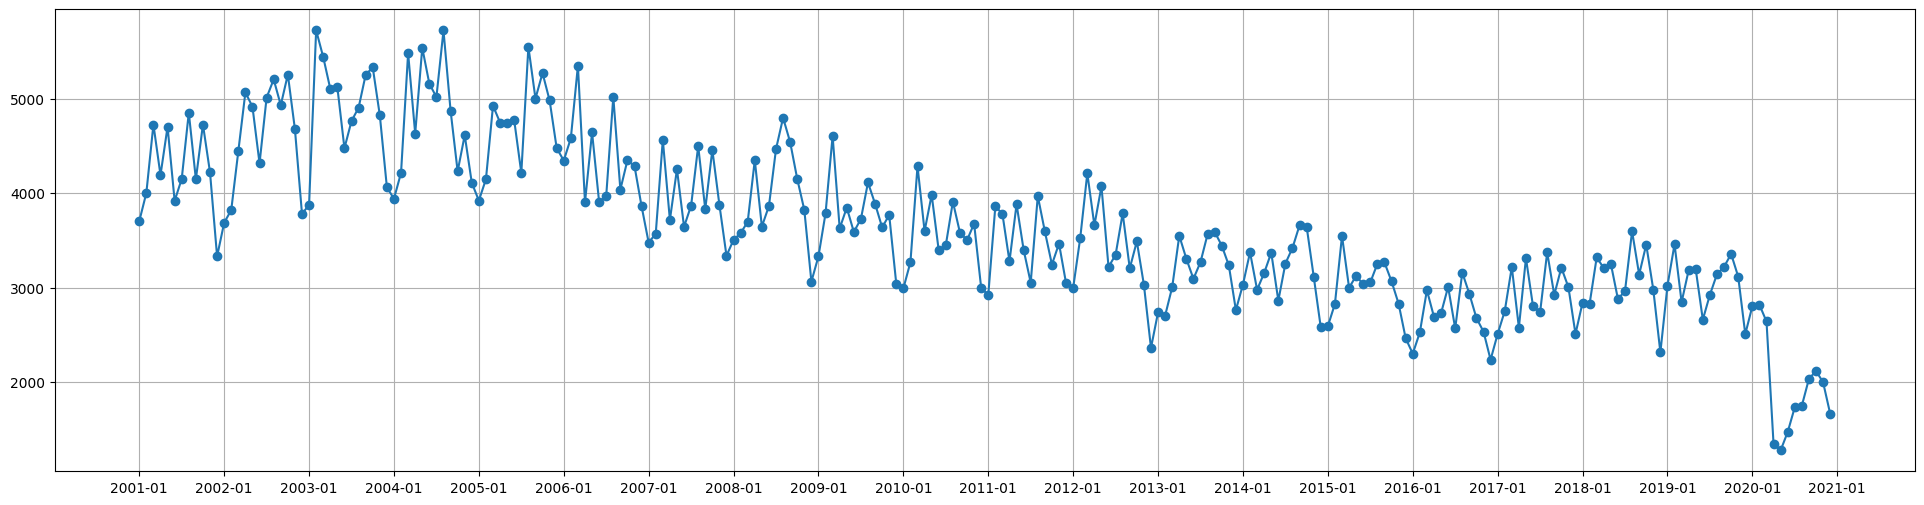

In [166]:
# cases_by_region_and_month.plot(x='ANO_MES')
fig_1, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(24,6))
data_yearly = data_pd_hanseniase.groupby(['ANO_MES']).size()
data_yearly_no_index = data_pd_hanseniase.groupby(['ANO_MES']).size().reset_index(name='total')
# data_yearly.plot()
ax_1.plot(data_yearly_no_index['ANO_MES'], data_yearly_no_index['total'], marker='o')
years = data_yearly.index[data_yearly.index.str.endswith('-01')].to_list()
years.append('2021-01')
ax_1.grid()
ax_1.set_xticks(years)
ax_1.set_xticklabels(years)



# for index in filtered_index:

# for index in years.to_list():
#     print(index)
#     ax_1.axvline(x=index, color='gray', linestyle='--', linewidth=2, alpha=0.7)

# # data_pd_hanseniase["ANO"] = data_pd_hanseniase["ANO_MES"].str[:4]
# anos_unicos = data_yearly.index.str[:4].drop_duplicates().values
# for ano in anos_unicos:
#     ax_1.axvline(x=ano, color='gray', linestyle='--', linewidth=2, alpha=0.7)


In [165]:
# years[-1] = ('2020-01')
list(years).append('2021-01')

In [101]:
data_yearly_pd = pd.DataFrame(data_yearly)

In [106]:
data_yearly_pd[(data_yearly_pd['ANO_MES']  == (anos_unicos + '-01')).index]

KeyError: 'ANO_MES'

In [99]:
# data_yearly = data_pd_hanseniase.groupby(['ANO_MES']).size()
# anos_unicos = data_yearly['ANO_MES'].str[:4].drop_duplicates().values
anos_unicos = data_yearly.index.str[:4].drop_duplicates().values
anos_unicos

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'], dtype=object)

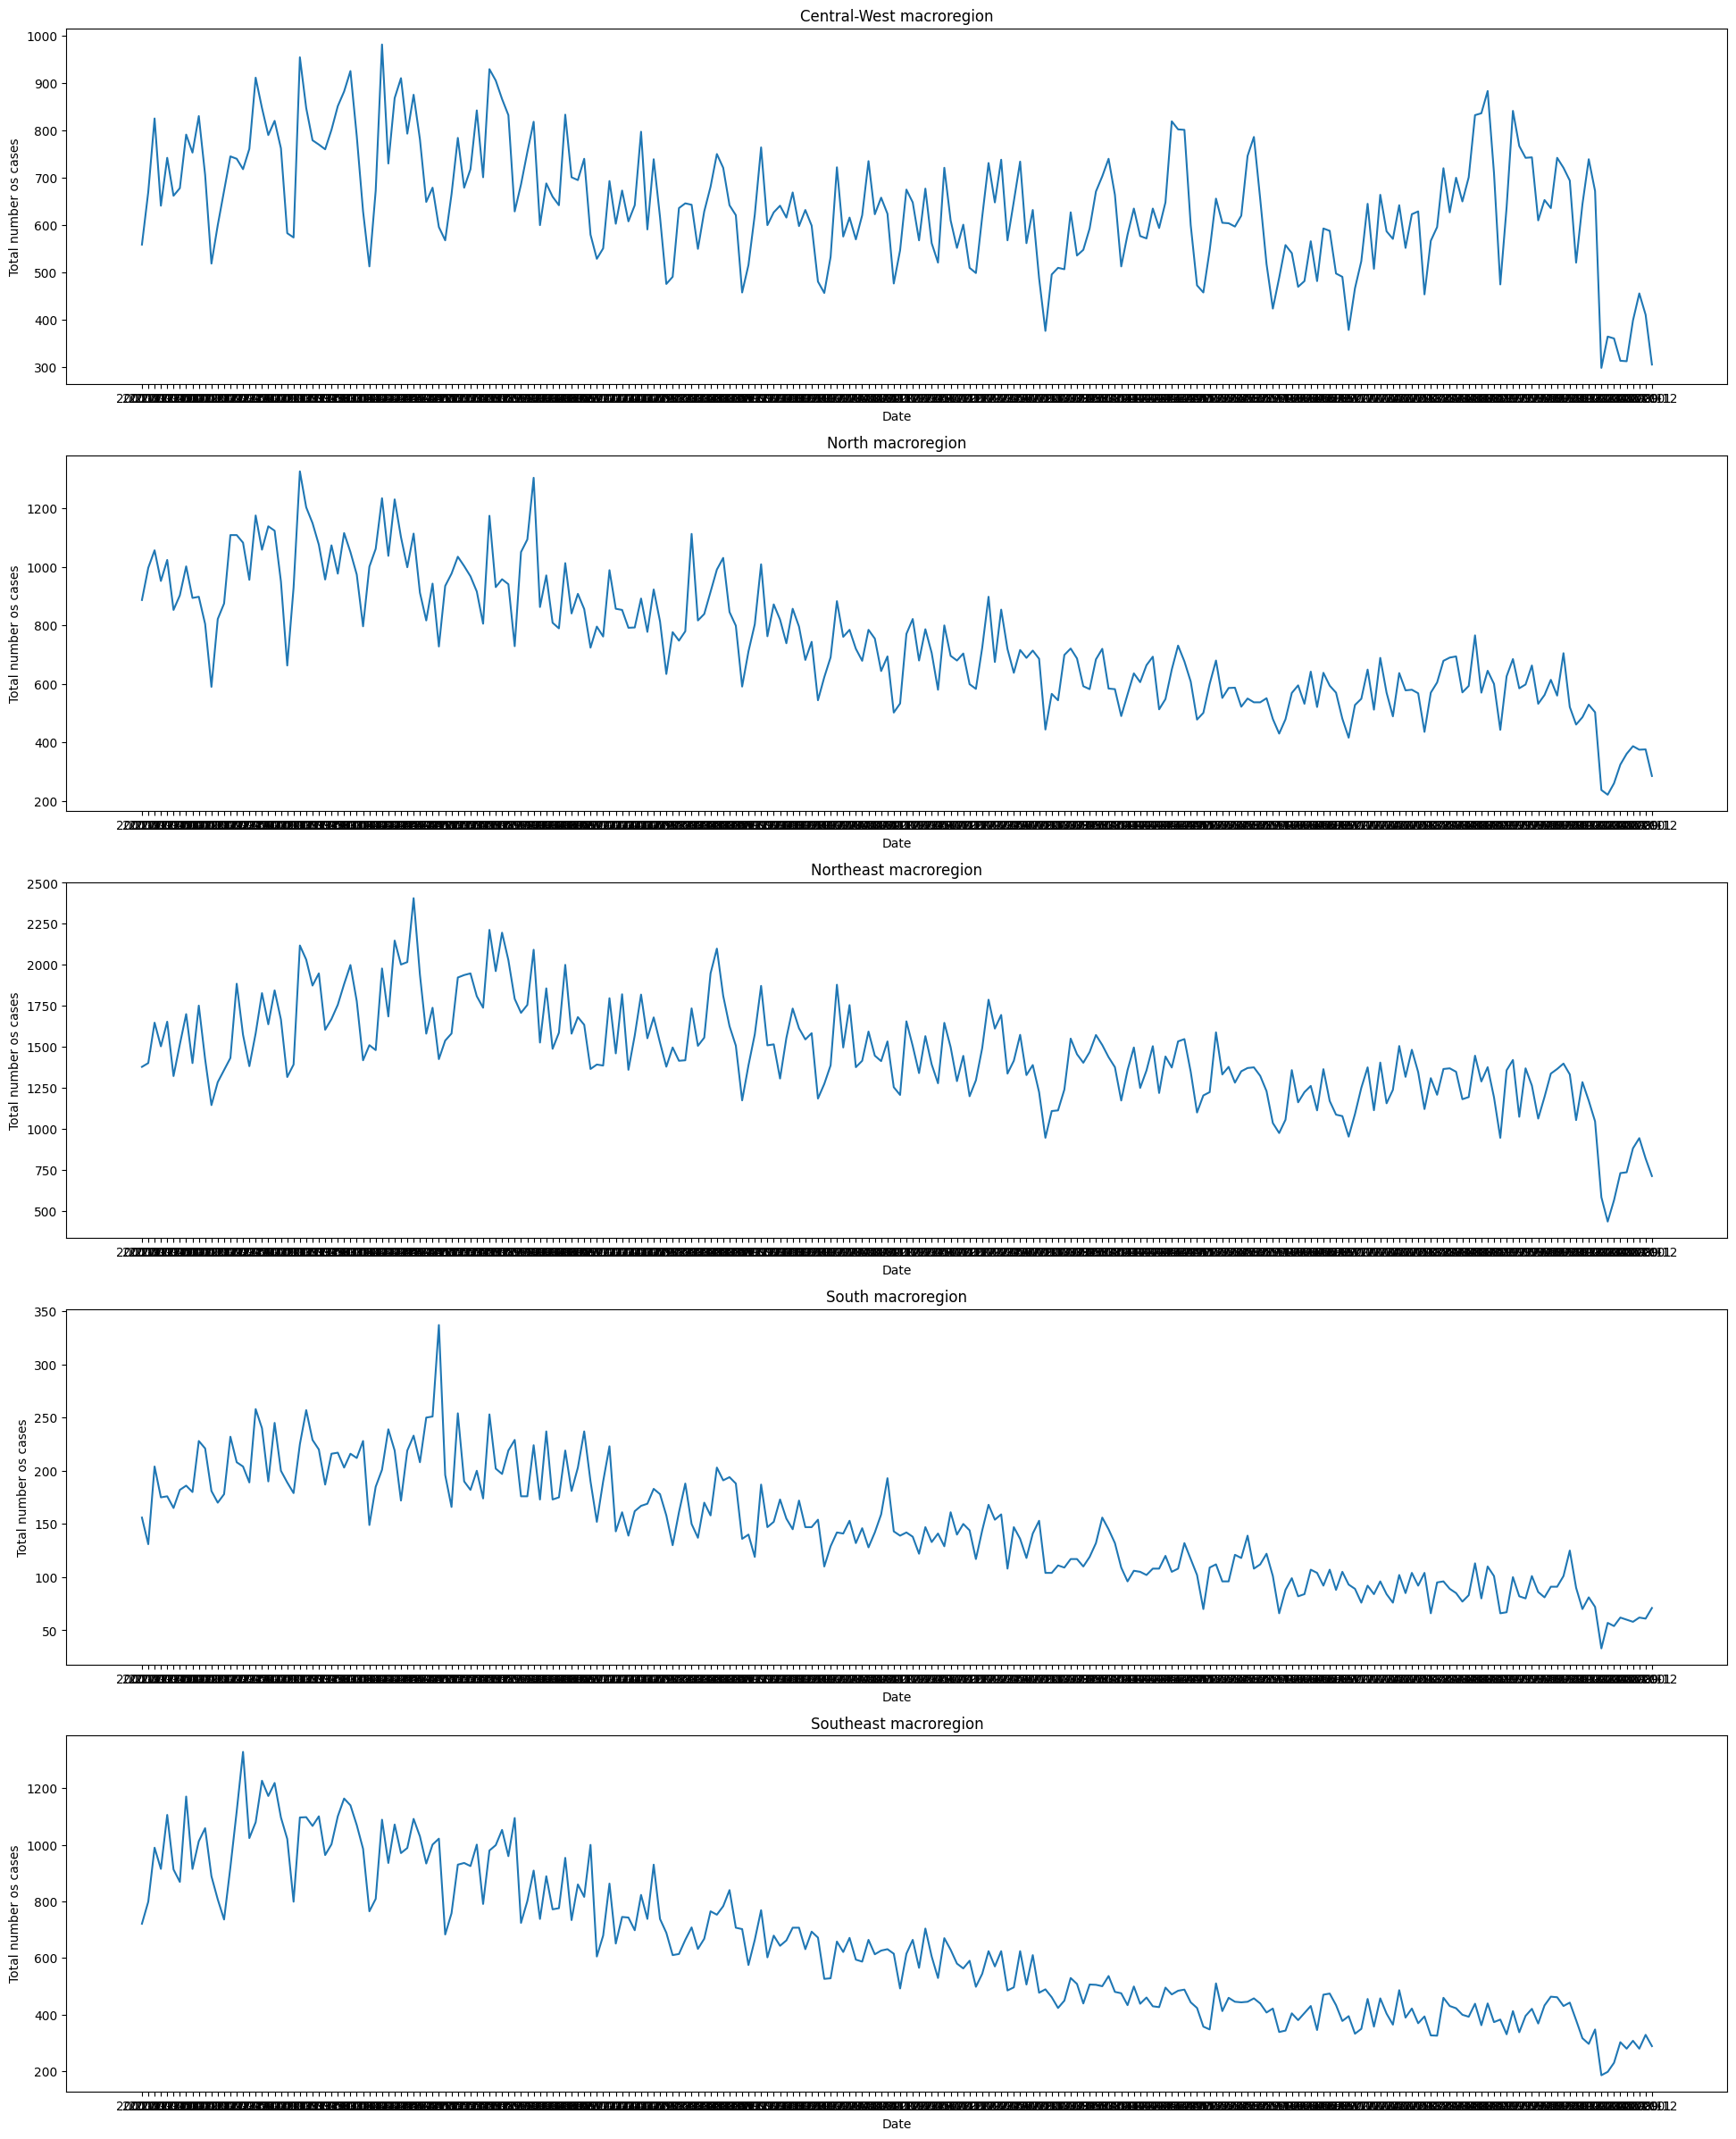

In [58]:
number_regions = cases_by_region_and_month['MACRO'].unique().__len__()
fig_0, ax_0 = plt.subplots(nrows=number_regions, ncols=1, figsize=(24,number_regions*6))
for i, region in enumerate(cases_by_region_and_month['MACRO'].unique()):
    _data =  cases_by_region_and_month[cases_by_region_and_month['MACRO'] == region]
    ax_0[i].plot(_data['ANO_MES'], _data['TOTAL_CASES'])
    ax_0[i].set_title(f'{region} macroregion')  # Title for each subplot
    ax_0[i].set_xlabel('Date')
    ax_0[i].set_ylabel('Total number os cases')

    anos_unicos = _data["ANO"].drop_duplicates().values
    for ano in anos_unicos:
        ano_inicio = f"{ano}-01"
        ax_0.axvline(x=ano_inicio, color='gray', linestyle='--', linewidth=2, alpha=0.7)



In [64]:
print(cases_by_region_and_month[cases_by_region_and_month['MACRO'] == 'South']['ANO_MES'].to_list())
#] cases_by_region_and_month['MACRO'].unique()

['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07'

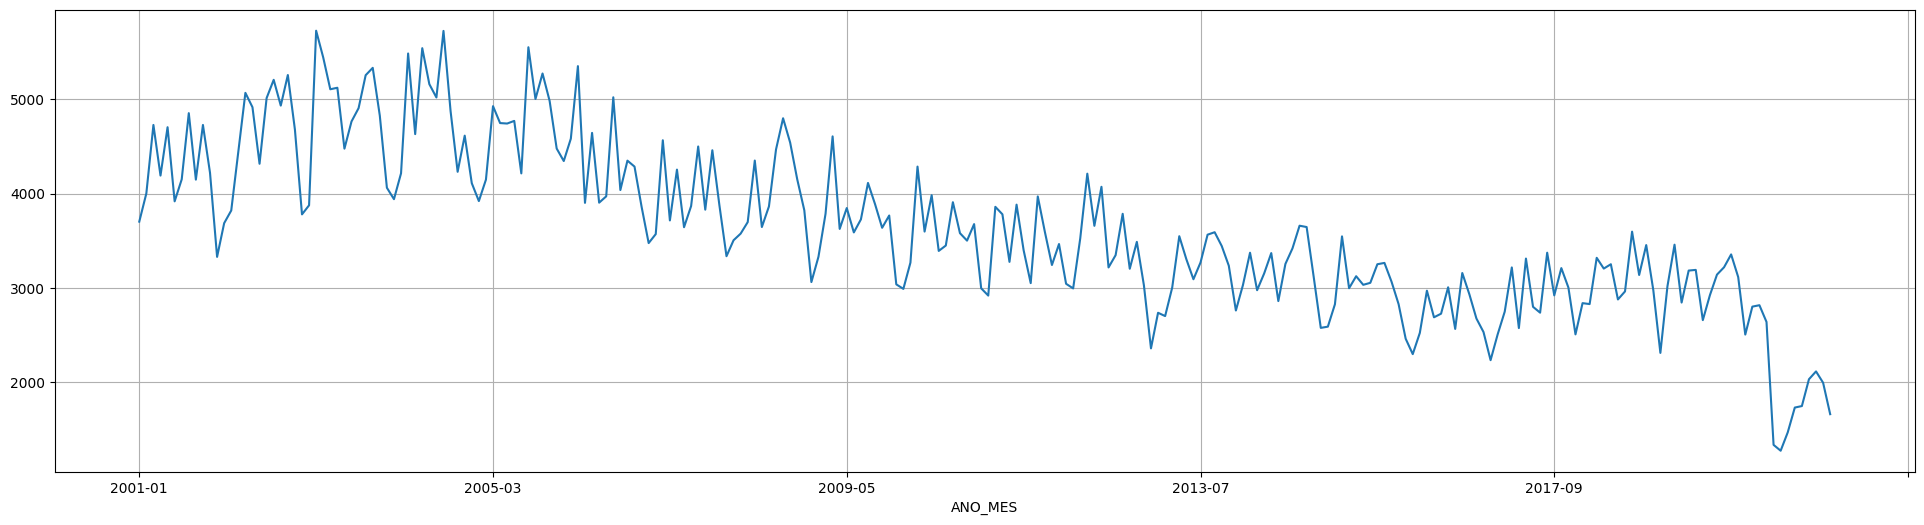

In [67]:
fig_1, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(24,6))
data_pd_hanseniase.groupby(['ANO_MES']).size().plot()
ax_1.grid()

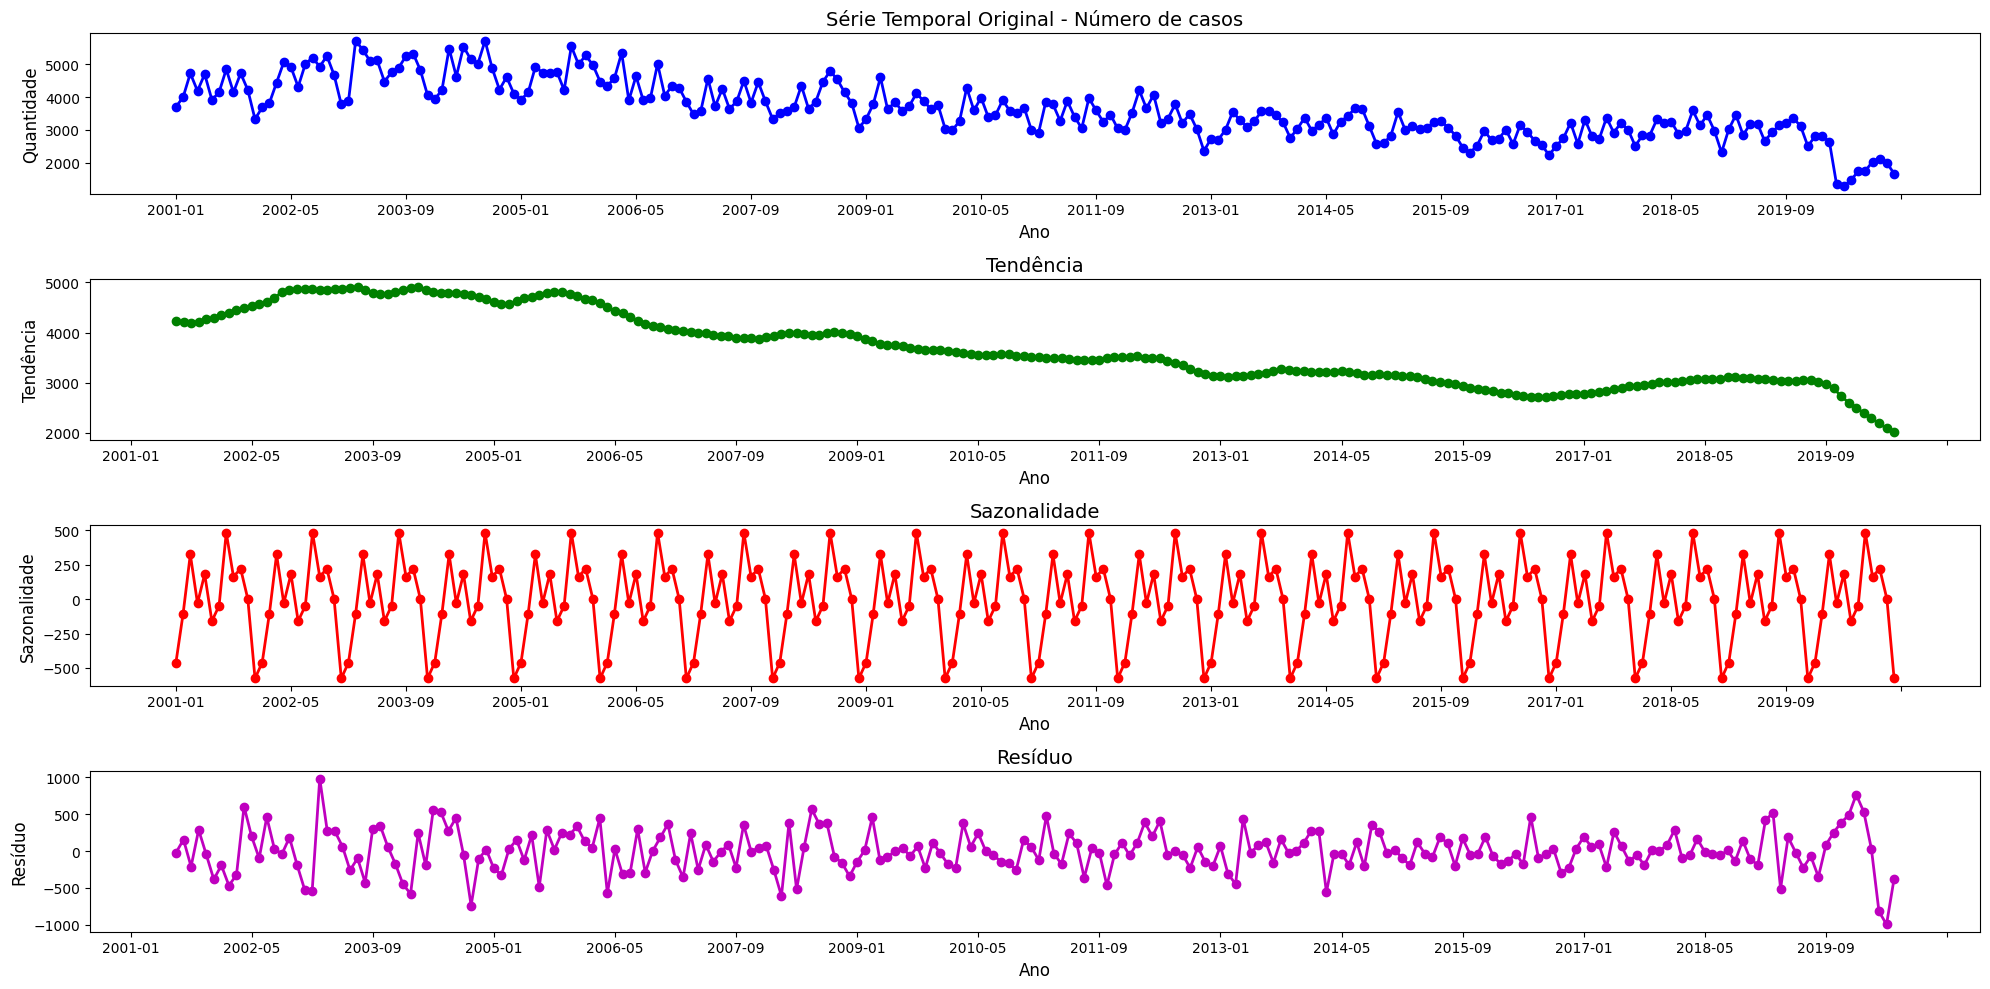

In [192]:
from matplotlib.ticker import MultipleLocator
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(dados_agrupados["quantidade"], model="additive", period=12)
tendencia = decompose.trend
sazonalidade = decompose.seasonal
residuo = decompose.resid

# Gerar o gráfico
fig, axes = plt.subplots(4, 1, figsize=(20, 10))

# Plotando a série temporal original
axes[0].plot(dados_agrupados["ANO_MES"], dados_agrupados["quantidade"], marker='o', linestyle='-', linewidth=2, color='b')
axes[0].set_title("Série Temporal Original - Número de casos", fontsize=14)
axes[0].set_xlabel("Ano", fontsize=12)
axes[0].set_ylabel("Quantidade", fontsize=12)
axes[0].xaxis.set_major_locator(MultipleLocator(16))

# Plotando a tendência
axes[1].plot(dados_agrupados["ANO_MES"], tendencia, marker='o', linestyle='-', linewidth=2, color='g')
axes[1].set_title("Tendência", fontsize=14)
axes[1].set_xlabel("Ano", fontsize=12)
axes[1].set_ylabel("Tendência", fontsize=12)
axes[1].xaxis.set_major_locator(MultipleLocator(2))
axes[1].xaxis.set_major_locator(MultipleLocator(16))

# Plotando a sazonalidade
axes[2].plot(dados_agrupados["ANO_MES"], sazonalidade, marker='o', linestyle='-', linewidth=2, color='r')
axes[2].set_title("Sazonalidade", fontsize=14)
axes[2].set_xlabel("Ano", fontsize=12)
axes[2].set_ylabel("Sazonalidade", fontsize=12)
axes[2].xaxis.set_major_locator(MultipleLocator(2))
axes[2].xaxis.set_major_locator(MultipleLocator(16))

# Plotando o resíduo
axes[3].plot(dados_agrupados["ANO_MES"], residuo, marker='o', linestyle='-', linewidth=2, color='m')
axes[3].set_title("Resíduo", fontsize=14)
axes[3].set_xlabel("Ano", fontsize=12)
axes[3].set_ylabel("Resíduo", fontsize=12)
axes[3].set_axis_on()
axes[3].xaxis.set_major_locator(MultipleLocator(2))
axes[3].xaxis.set_major_locator(MultipleLocator(16))

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.show()


In [190]:
for i in range(2,36):
    decompose = seasonal_decompose(dados_agrupados["quantidade"], model="additive", period=i)
    tendencia = decompose.trend
    sazonalidade = decompose.seasonal
    residuo = decompose.resid
    max_residuo = residuo.max() 
    min_residuo = residuo.min() 
    print(f'{max_residuo} {min_residuo} {max_residuo-min_residuo}')
    # break

564.9789915966387 -515.2710084033613 1080.25
796.0019514767936 -650.1077531645564 1446.10970464135
871.0386652542372 -730.7261652542372 1601.7648305084745
940.5510815602834 -830.2191312056738 1770.7702127659572
738.1745014245017 -724.1096866096865 1462.2841880341882
912.0721197569939 -989.2222525373783 1901.2943722943721
863.3607219827586 -1004.8504849137931 1868.2112068965516
912.1242355175691 -1006.4227730294392 1918.5470085470083
964.5173913043478 -1024.7826086956525 1989.3000000000002
881.738311688312 -1028.4435064935064 1910.1818181818185
978.8572733918132 -992.8400950292396 1971.697368421053
998.3028193525934 -1021.68863363886 2019.9914529914533
953.6080619747902 -979.6538865546217 1933.261948529412
930.2258333333336 -980.3394444444444 1910.5652777777782
1060.0382254464287 -1024.7430245535713 2084.78125
939.3756226472492 -1135.2093805848135 2074.5850032320627
840.1645991611274 -782.6112199271922 1622.7758190883196
961.4841559640741 -1109.2000545622427 2070.6842105263167
1213.9906

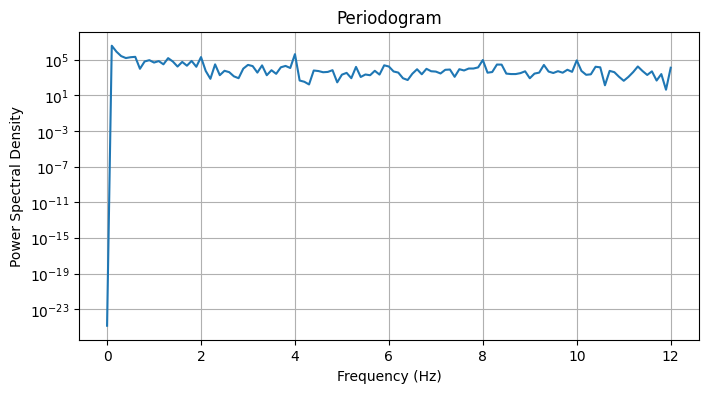

In [196]:
from scipy.signal import periodogram

# Compute periodogram
frequencies, power = periodogram(dados_agrupados["quantidade"], 24)

# Plot
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.grid()
plt.show()


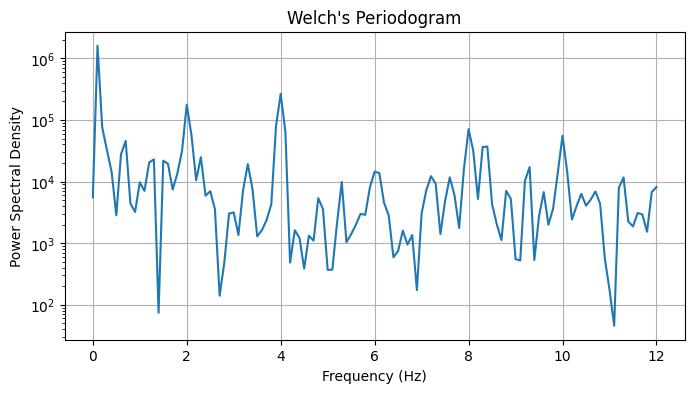

In [198]:
from scipy.signal import welch

frequencies, power = welch(dados_agrupados["quantidade"], 24, nperseg=256)

plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title("Welch's Periodogram")
plt.grid()
plt.show()


In [ ]:
dados_agrupados_ano = dados_agrupados.copy()
dados_agrupados_ano['ANO'] = dados_agrupados["ANO_MES"].str[:4]
# anos_unicos = data_yearly.index.str[:4].drop_duplicates().values

# # Example data
# categories = ["Start", "Sales", "Marketing", "Development", "Operational Costs", "Profit"]
# values = [500, 300, -150, -100, -50, 500 + 300 - 150 - 100 - 50]

# Compute positions for bars
cumulative = np.cumsum([0] + values[:-1])
colors = ['green' if v > 0 else 'red' for v in values]

# Plot waterfall chart
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.bar(categories, values, bottom=cumulative, color=colors)

# Add value labels
for bar, value in zip(bars, values):
    yval = bar.get_y() + bar.get_height() if value < 0 else bar.get_y()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{value}", ha='center', va='bottom' if value > 0 else 'top')

plt.title("Waterfall Chart")
plt.xlabel("Categories")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: xlabel='ANO'>

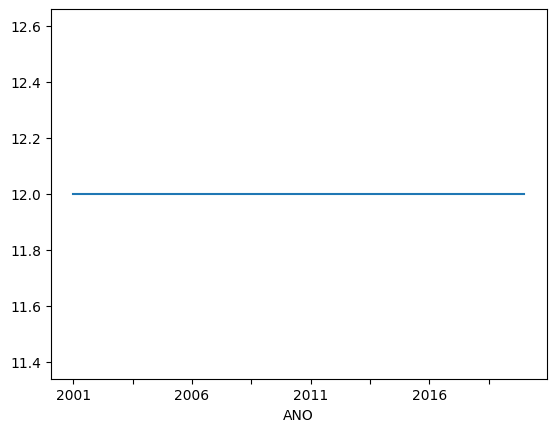

In [201]:
dados_agrupados_ano = dados_agrupados.copy()
dados_agrupados_ano['ANO'] = dados_agrupados["ANO_MES"].str[:4]
# dados_agrupados_ano
dados_agrupados_ano.groupby(['ANO']).size().plot()


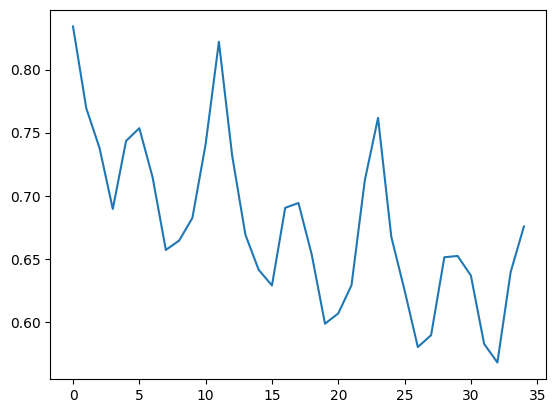

In [204]:
auto_corre = []
for i in range(1,36):
    auto_corre.append(dados_agrupados['quantidade'].autocorr(lag=i))

plt.plot(auto_corre)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Sample autocorrelation")
plt.show()

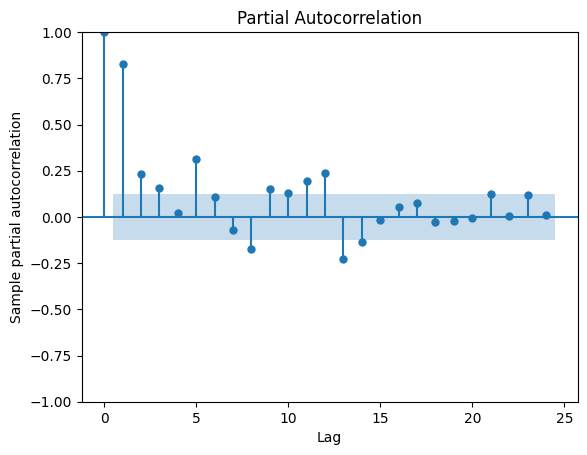

In [208]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the partial autocorrelation function (PACF) for lags 1 to 40
plot_pacf(dados_agrupados['quantidade'], lags=24)
# plt.title("Partial Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Sample partial autocorrelation")
plt.show()


In [209]:
quantidade =  dados_agrupados['quantidade']


# Step 1: Calculate the median
median = np.median(quantidade)

# Step 2: Calculate the absolute deviation from the median
absolute_deviations = np.abs(quantidade - median)

# Step 3: Calculate the Median Absolute Deviation (MAD)
mad = np.median(absolute_deviations)

# Step 4: Define the threshold for outliers (multiply MAD by 1.4826 to make it scale equivalent to standard deviation)
threshold = mad * 1.4826

# Step 5: Identify outliers
outliers = [x for x in quantidade if np.abs(x - median) > threshold]

# Output the results
print(f"Median: {median}")
print(f"MAD: {mad}")
print(f"Threshold for outliers: {threshold}")
print(f"Outliers: {outliers}")

Median: 3568.0
MAD: 571.5
Threshold for outliers: 847.3059
Outliers: [4727, 4703, 4852, 4727, 4443, 5067, 4915, 5012, 5205, 4932, 5256, 4678, 5725, 5442, 5105, 5121, 4476, 4764, 4905, 5254, 5332, 4825, 5484, 4630, 5540, 5159, 5018, 5723, 4875, 4614, 4926, 4747, 4742, 4770, 5550, 5002, 5272, 4982, 4477, 4582, 5350, 4643, 5020, 4565, 4499, 4459, 4467, 4798, 4540, 4606, 2361, 2703, 2578, 2591, 2463, 2300, 2525, 2690, 2567, 2677, 2534, 2236, 2509, 2576, 2509, 2313, 2660, 2507, 2641, 1339, 1277, 1471, 1734, 1750, 2034, 2117, 1997, 1664]


In [213]:
len(outliers)
len(quantidade)


240

In [216]:
# Step 1: Calculate the mean
mean = np.mean(quantidade)

# Step 2: Calculate the standard deviation
std_dev = np.std(quantidade)

# Step 3: Define the threshold (typically k = 2 or 3)
k = 2  # You can adjust this value to 3 for a more strict criterion

# Step 4: Identify outliers
outliers = [x for x in quantidade if abs(x - mean) > k * std_dev]

# Output the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Threshold for outliers (k={k}): {k * std_dev}")
print(f"Outliers: {outliers}")

Mean: 3636.820833333333
Standard Deviation: 874.1217766417363
Threshold for outliers (k=2): 1748.2435532834727
Outliers: [5725, 5442, 5484, 5540, 5723, 5550, 1339, 1277, 1471, 1734, 1750, 1664]


In [221]:
dados_agrupados_com_outlier = dados_agrupados.copy()
dados_agrupados_com_outlier['outlier'] = dados_agrupados_com_outlier['quantidade'].apply(lambda x: abs(x - mean) > k * std_dev)
dados_agrupados_com_outlier

,ANO_MES,quantidade,ANO,outlier
0,2001-01,3703,2001,False
1,2001-02,4002,2001,False
2,2001-03,4727,2001,False
3,2001-04,4191,2001,False
4,2001-05,4703,2001,False
...,...,...,...,...
235,2020-08,1750,2020,True
236,2020-09,2034,2020,False
237,2020-10,2117,2020,False
238,2020-11,1997,2020,False


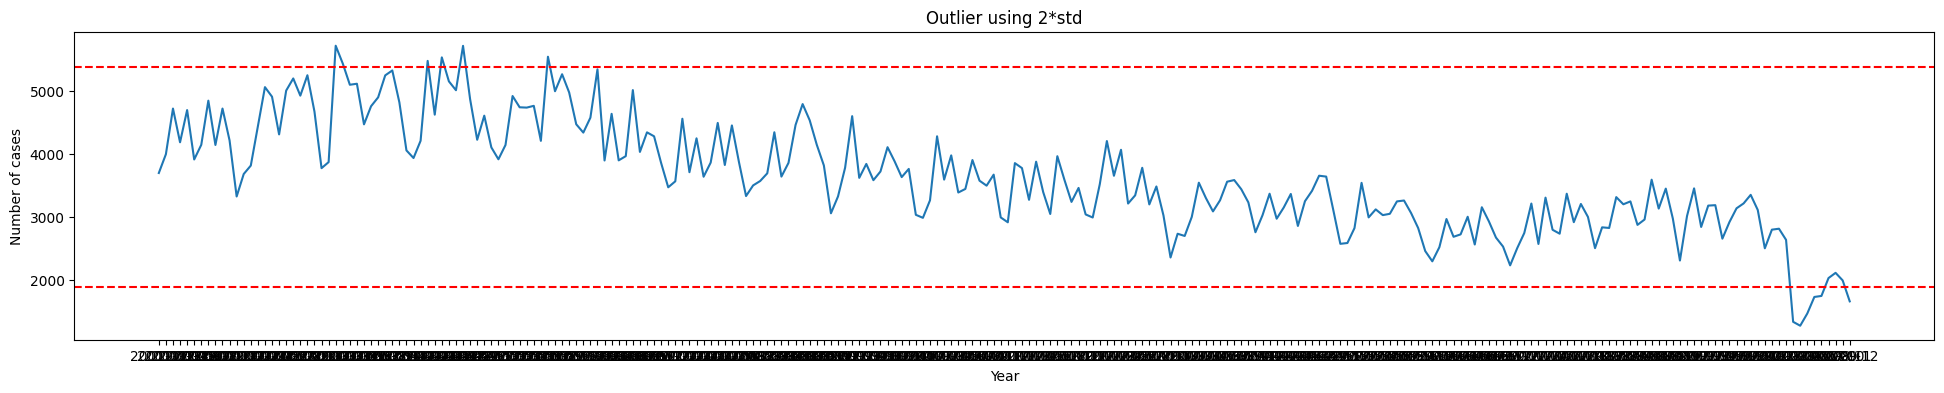

In [233]:
# dados_agrupados.plot()
fig, ax_outlier = plt.subplots(1, 1, figsize=(24, 4))
plt.plot(dados_agrupados['ANO_MES'], dados_agrupados['quantidade'])
# Add a horizontal line at y = 10
plt.axhline(y=mean-(k * std_dev), color='r', linestyle='--', label="Horizontal Line")
plt.axhline(y=mean+(k * std_dev), color='r', linestyle='--', label="Horizontal Line")
plt.title("Outlier using 2*std")
plt.xlabel("Year")
plt.ylabel("Number of cases")
plt.show()

### Moving method method

In [235]:
dados_agrupados_com_outlier_movel = dados_agrupados.copy()

# Step 1: Set the window size (e.g., 5 data points)
window_size = 5

# Step 2: Calculate the rolling mean and rolling standard deviation
dados_agrupados_com_outlier_movel['rolling_mean'] = dados_agrupados_com_outlier_movel['quantidade'].rolling(window=window_size, min_periods=1).mean()
dados_agrupados_com_outlier_movel['rolling_std'] = dados_agrupados_com_outlier_movel['quantidade'].rolling(window=window_size, min_periods=1).std()

# Step 3: Define the threshold for outliers (e.g., 2 standard deviations)
k = 2

# Step 4: Identify outliers: check if the quantity is more than `k` standard deviations away from the rolling mean
dados_agrupados_com_outlier_movel['is_outlier'] = abs(dados_agrupados_com_outlier_movel['quantidade'] - dados_agrupados_com_outlier_movel['rolling_mean']) > k * dados_agrupados_com_outlier_movel['rolling_std']


In [236]:
dados_agrupados_com_outlier_movel

,ANO_MES,quantidade,ANO,rolling_mean,rolling_std,is_outlier
0,2001-01,3703,2001,3703.000000,NaN,False
1,2001-02,4002,2001,3852.500000,211.424928,False
2,2001-03,4727,2001,4144.000000,526.561487,False
3,2001-04,4191,2001,4306.666667,376.085540,False
4,2001-05,4703,2001,4540.333333,302.769439,False
...,...,...,...,...,...,...
235,2020-08,1750,2020,1651.666667,156.666312,False
236,2020-09,2034,2020,1839.333333,168.775986,False
237,2020-10,2117,2020,1967.000000,192.455190,False
238,2020-11,1997,2020,2049.333333,61.451878,False


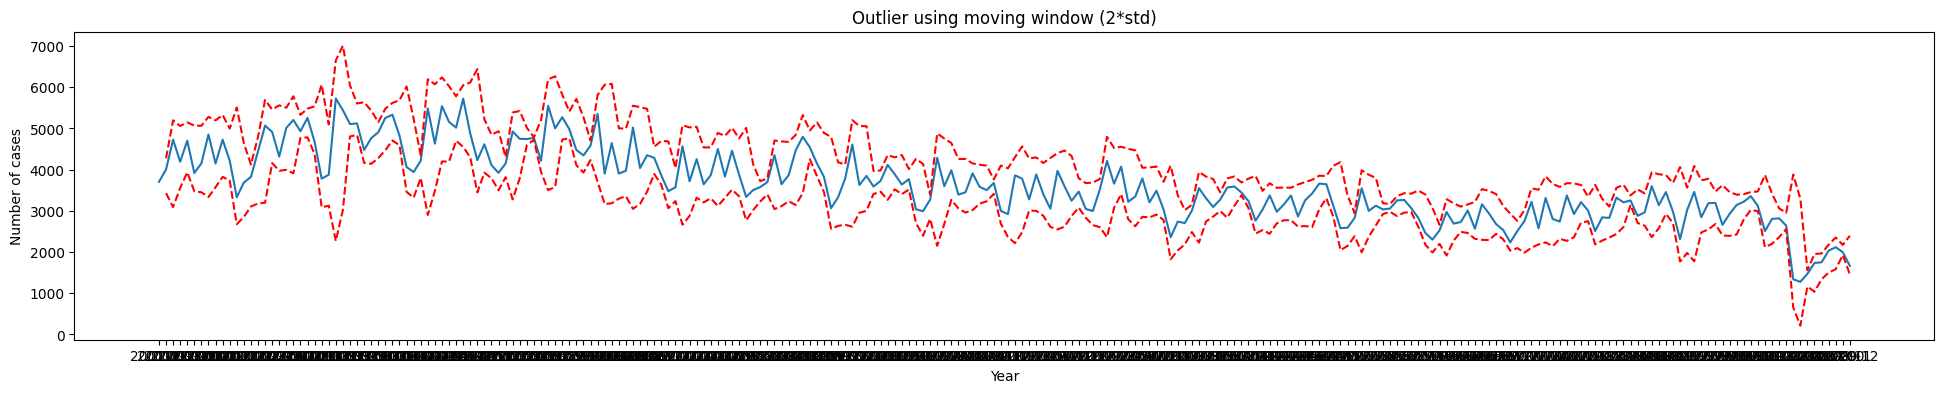

In [241]:
fig, ax_outlier = plt.subplots(1, 1, figsize=(24, 4))
upper_limits=dados_agrupados_com_outlier_movel['rolling_mean'] + (k * dados_agrupados_com_outlier_movel['rolling_std'])
lower_limits=dados_agrupados_com_outlier_movel['rolling_mean'] - (k * dados_agrupados_com_outlier_movel['rolling_std'])
ax_outlier.plot(dados_agrupados_com_outlier_movel['ANO_MES'], dados_agrupados_com_outlier_movel['quantidade'])
ax_outlier.plot(dados_agrupados_com_outlier_movel['ANO_MES'], upper_limits, color='r', linestyle='--')
ax_outlier.plot(dados_agrupados_com_outlier_movel['ANO_MES'], lower_limits, color='r', linestyle='--')
plt.title("Outlier using moving window (2*std)")
plt.xlabel("Year")
plt.ylabel("Number of cases")
plt.show()